<a href="https://colab.research.google.com/github/lianjie99/Pill-Inspection-R-S/blob/main/Pill_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Things to be done for yolov5 to work properly

1.   Modify read image at around code line 663 and line 238 with the following (modify according the code):
*yolov5/utils/dataset.py*
```
import skimage.io
im = skimage.io.imread("public_data/000a4782b0db573993c90af6f646d3d4.tiff")
im = cv2.resize(im,(640,640))
im = np.clip(im, 0.0, 1.0)
im = (im * 255).astype("uint8")
```

2.   Modify Anchor boxes (yolov5s)
*yolov5/models/yolov5s.yaml*
```
[10,10, 16,16, 33,33]
[60,60, 62,45, 59,119]
[116,90, 156,198, 373,326]
```

3. Modify all hyperparameters
*yolov5/data/hyps/...low/med/high.yaml* < all of them
```
Change lr to 1e-3 for Adam
```

4. Modify data.yaml file to point to training and validation images folder
*/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml*
```
Must set the directories according to the directory tree structures
```


# Setup environment in repository

### Temporary yolov5 repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5   # clone repo
!pip install -U -r yolov5/requirements.txt   &> /dev/null# install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 13401, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 13401 (delta 16), reused 10 (delta 4), pack-reused 13368
Receiving objects: 100% (13401/13401), 12.13 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (9342/9342), done.


## Import dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import cv2

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import Image  # for displaying images

# Training process

In [ ]:
# save best model to current repo
import shutil

shutil.copytree("/content/yolov5",r"/content/drive/MyDrive/Colab Notebooks/rns")

'/content/drive/MyDrive/Colab Notebooks/rns'

## Train YOLOv5s using yaml file and dataset provided

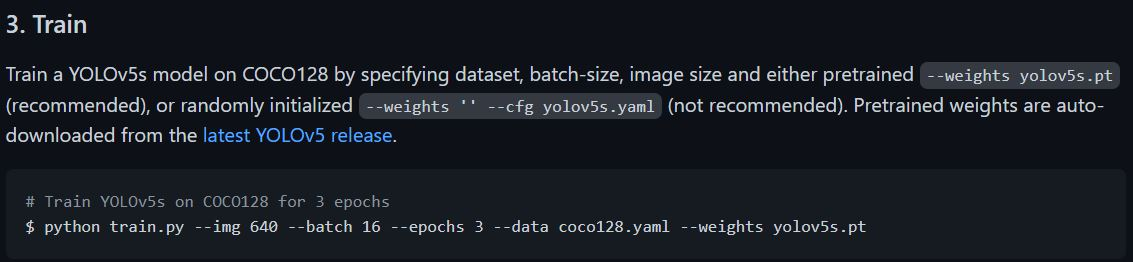

In [ ]:
!python train.py --help

Best practices for training

https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results

In [ ]:
# Set cfg file for YOLOv5s architecture or use yolov5s pretrained weights

# !python train.py --img 640 --batch 16 --epochs 100 --data "/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml" --weights "yolov5m.pt" 

# with pretrained weight
!python train.py --img 640 --batch 32 --epochs 50 --data "/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml" --weights 'yolov5s.pt' --cfg "models/yolov5s.yaml" --optimizer "Adam"

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
/bin/sh: 1: S/yolov5: not found
YOLOv5 🚀 2022-5-4 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.001, lrf=0.01, momentum=0.937, 

## Save weight into local repo (Drive) (Optional)

In [ ]:
# save best model to current repo
import shutil

shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt",r"/content/drive/MyDrive/Colab Notebooks/R&S/best_public_yolov5n.pt")

'/content/drive/MyDrive/Colab Notebooks/R&S/best_public_yolov5n.pt'

# Testing the model

In [ ]:
# source (image for detection, can be video or youtube link or ...) *Refer the documentation
# data (the dataset structure)
# weights (the trained best weight.pt file)
# img (image size)
# conf (confidence score)
# save-txt (save the bbox text file)

!python detect.py --source "/content/drive/MyDrive/Colab Notebooks/R&S/test/images/ad6d406cf641d42acf05ab8d4db6ede1.tiff" --data "/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml" --weights "/content/drive/MyDrive/Colab Notebooks/R&S/best_public_yolov5n.pt" --img 640 --conf 0.6 --save-txt 

detect: weights=['/content/drive/MyDrive/Colab Notebooks/R&S/best_public_yolov5n.pt'], source=/content/drive/MyDrive/Colab Notebooks/R&S/test/images/ad6d406cf641d42acf05ab8d4db6ede1.tiff, data=/content/drive/MyDrive/Colab Notebooks/R&S/data.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1761871 parameters, 0 gradients, 4.2 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/R&S/test/images/ad6d406cf641d42acf05ab8d4db6ede1.tiff: 640x640 1 missing, 14 presents, Done. (0.018s)
Speed: 0.7ms pre-process, 18.1ms inference, 1.8ms NMS per image at shape (1, 3, 